<a href="https://colab.research.google.com/github/anis-dela/email_spam_identification/blob/main/%5B0%5D_Project_2_Email_Spam_Identification_Portfolio_Anis_Dela_Desela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Spam Identification Project

###Layout

##### 1. <font> Importing Data to Python:</font>
    * Checking data type
    * Statistic Descriptive
    * Outcome data distribution
    * Drop Duplicates
##### 2. <font> Data Preprocessing:</font>
    * Input-Output Split, Train-Test Split
    * Imputation, Processing Categorical, Normalization
##### 3.<font> Training Machine Learning:</font>
    * Choose Score to optimize and Hyperparameter Space

### Data Overview

- Task : Classification
- Objective : To detect which email considered as spam

**Data Description**

- `Email`: The email address of the sender.
- `Subject`: The subject line of the email.
- `Sender`: The email address of the sender.
- `Recipient`: The email address of the recipient.
- `Date`: The date when the email was sent.
- `Time` (24 hours format): The time of day when the email was sent (in 24-hour format).
- `Attachments`: The number of attachments present in the email.
- `Link Count`: The number of hyperlinks present in the email.
- `Word Count`: The total number of words in the email.
- `Uppercase Count`: The count of words in uppercase letters.
- `Exclamation Count`: The count of exclamation marks in the email.
- `Question Count`: The count of question marks in the email.
- `Dollar Count`: The count of dollar signs in the email.
- `Punctuation Count`: The count of various punctuation marks (e.g., commas, periods).
- `HTML Tags Count`: The count of HTML tags in the email.
- `Spam Indicator`: A binary label indicating whether the email is spam (1) or not (0).

### **1. Importing Data**

The dataset used in this project is available in : https://www.kaggle.com/datasets/nanditapore/spam-email-dataset?resource=download

In [ ]:
#Import All Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Modelling
import statsmodels.formula.api as smf #I'll use statsmodels library
from scipy.special import expit, logit
from sklearn import linear_model

######**Load Data**

In [ ]:
email = pd.read_csv("/content/drive/MyDrive/Pacmann/Project/Python Project/Email Spam Identification - Project - Spam Email - Logistic Regression.csv")
email.head(3)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1


#####**Checking each metrics' data type**

In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

#####**Checking the statistic descriptive**

In [ ]:
email.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


#####**Check the outcome data balance**

In [ ]:
print(f"Percentage Not Spam :{(email['Spam Indicator'].value_counts()[0]/email['Spam Indicator'].count())*100: .2f}%")
print(f"Percentage Spam :{(email['Spam Indicator'].value_counts()[1]/email['Spam Indicator'].count())*100: .2f}%")

Percentage Not Spam : 50.30%
Percentage Spam : 49.70%


#####**Check & drop duplicated data**

In [ ]:
#check duplicated data
duplicate_status = email.duplicated()
duplicate_status

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Length: 6000, dtype: bool

In [ ]:
#sum the duplicated data
duplicate_status.sum()

0

- no data dropped due to no duplicated data

In [ ]:
#Check data sanity
email.shape

(6000, 16)

###**2. Data Pre-Processing**

In [ ]:
email.head(2)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1


#####**Data Outlier**

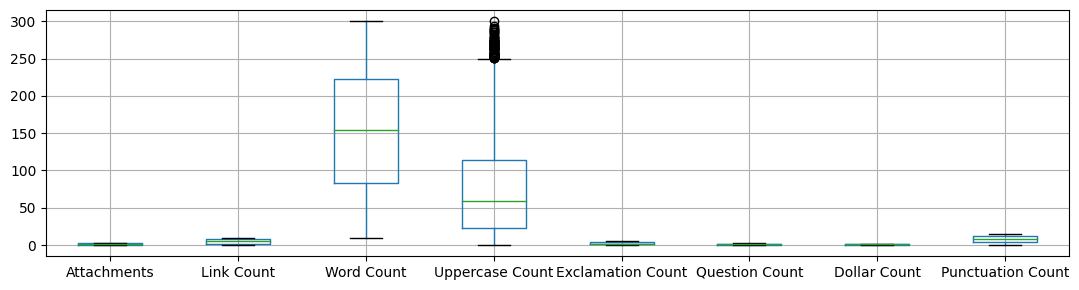

In [ ]:
#Checking outlier via boxplot for all columns
fig, ax = plt.subplots(figsize = (11, 3))

columns = ['Attachments', 'Link Count',
            'Word Count','Uppercase Count','Exclamation Count',
            'Question Count','Dollar Count','Punctuation Count']

email.boxplot(column = columns, ax = ax)

plt.tight_layout()
plt.show()

- Uppercase have a lot of outliers in the data
- I would like to check how much outliers in the data, to decide the best decision working with outliers

In [ ]:
# Calculate Q1 & Q3 to form IQR
Q1 = email["Uppercase Count"].quantile(0.25)
Q3 = email["Uppercase Count"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the total outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
total_outlier = len(email[(email["Uppercase Count"] < lower_bound) | (email["Uppercase Count"] > upper_bound)])
print(total_outlier)
print(f"Outlier percentage in the Uppercase Count column from email train dataset: {(total_outlier / len(email))*100}%")

81
Outlier percentage in the Uppercase Count column from email train dataset: 1.35%


In [ ]:
email = email[(email["Uppercase Count"] >= lower_bound) & (email["Uppercase Count"] <= upper_bound)]

######**Outlier Checker**

In [ ]:
# Calculate Q1 & Q3 to form IQR
Q1 = email["Uppercase Count"].quantile(0.25)
Q3 = email["Uppercase Count"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the total outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
total_outlier = len(email[(email["Uppercase Count"] < lower_bound) | (email["Uppercase Count"] > upper_bound)])
print(total_outlier)
print(f"Outlier percentage in the Uppercase Count column from email train dataset: {(total_outlier / len(email))*100}%")

26
Outlier percentage in the Uppercase Count column from email train dataset: 0.4392633890859942%


In [ ]:
email = email[(email["Uppercase Count"] >= lower_bound) & (email["Uppercase Count"] <= upper_bound)]

In [ ]:
# Calculate Q1 & Q3 to form IQR
Q1 = email["Uppercase Count"].quantile(0.25)
Q3 = email["Uppercase Count"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the total outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
total_outlier = len(email[(email["Uppercase Count"] < lower_bound) | (email["Uppercase Count"] > upper_bound)])
print(total_outlier)
print(f"Outlier percentage in the Uppercase Count column from email train dataset: {(total_outlier / len(email))*100}%")

13
Outlier percentage in the Uppercase Count column from email train dataset: 0.2206007127099949%


In [ ]:
email = email[(email["Uppercase Count"] >= lower_bound) & (email["Uppercase Count"] <= upper_bound)]

In [ ]:
# Calculate Q1 & Q3 to form IQR
Q1 = email["Uppercase Count"].quantile(0.25)
Q3 = email["Uppercase Count"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the total outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
total_outlier = len(email[(email["Uppercase Count"] < lower_bound) | (email["Uppercase Count"] > upper_bound)])
print(total_outlier)
print(f"Outlier percentage in the Uppercase Count column from email train dataset: {(total_outlier / len(email))*100}%")

0
Outlier percentage in the Uppercase Count column from email train dataset: 0.0%


In [ ]:
email = email[(email["Uppercase Count"] >= lower_bound) & (email["Uppercase Count"] <= upper_bound)]

- all outliers are successfully omitted

In [ ]:
#Check data sanity
email.shape

(5880, 16)

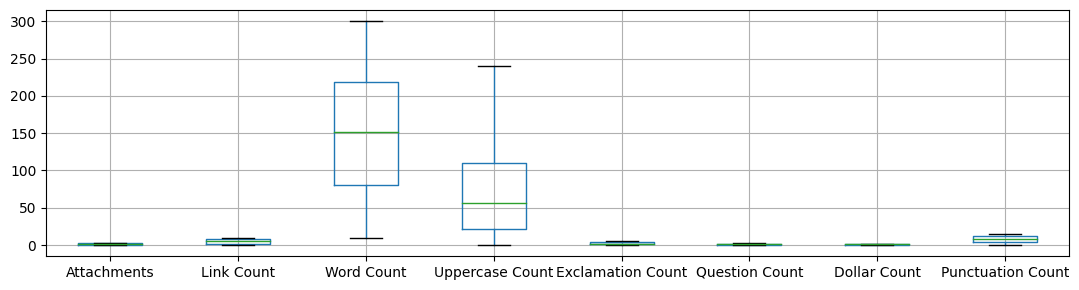

In [ ]:
#Checking outlier via boxplot for all columns
fig, ax = plt.subplots(figsize = (11, 3))

columns = ['Attachments', 'Link Count',
            'Word Count','Uppercase Count','Exclamation Count',
            'Question Count','Dollar Count','Punctuation Count']

email.boxplot(column = columns, ax = ax)

plt.tight_layout()
plt.show()

#####**Input-Output Split**

- Y = output variable
- X = input variable

In [ ]:
y = email["Spam Indicator"]
y.head(5)

0    1
1    1
2    1
3    0
6    0
Name: Spam Indicator, dtype: int64

In [ ]:
X = email.drop(["Spam Indicator","Email", "Subject", "Sender", "Recipient", "Date", "Time"], axis = 1)
X.head(1)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
0,3,0,191,32,3,3,0,11,1


In [ ]:
for i in X.columns:
  print(i, ":", len(X[i].value_counts()))

Attachments : 4
Link Count : 11
Word Count : 291
Uppercase Count : 240
Exclamation Count : 6
Question Count : 4
Dollar Count : 3
Punctuation Count : 16
HTML Tags Count : 6


- all metrics all numerical

#####**Train-Test Split**

In [ ]:
#Import library
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=123)

In [ ]:
print(f"Shape of Xtrain : {X_train.shape}")
print(f"Shape of Xtest : {X_test.shape}")
print(f"Shape of ytrain : {y_train.shape}")
print(f"Shape of ytest : {y_test.shape}")

Shape of Xtrain : (4704, 9)
Shape of Xtest : (1176, 9)
Shape of ytrain : (4704,)
Shape of ytest : (1176,)


## Training Data

#####**Missing Data Checking**

In [ ]:
#Checking on input variable
X_train.isnull().sum()

Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
dtype: int64

- no missing data found

#####**Standardizing Variables**

In [ ]:
X_train.head(2)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
939,0,4,138,100,5,3,0,9,0
5129,3,9,211,4,0,3,2,7,4


In [ ]:
#Import library
from sklearn.preprocessing import StandardScaler

In [ ]:
#Define columns & index
X_train_columns = X_train.columns
X_train_index = X_train.index

In [ ]:
#Fit data
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler()

In [ ]:
#Transform data
standardized_raw = standardizer.transform(X_train)
X_standardized_data = pd.DataFrame(standardized_raw)

In [ ]:
#Return back columns & index
X_standardized_data.columns = X_train_columns
X_standardized_data.index = X_train_index
X_standardized_data.head(2)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
939,-1.339332,-0.321978,-0.163302,0.469558,1.461017,1.368778,-1.222796,0.308752,-1.486035
5129,1.329497,1.254728,0.726972,-1.146318,-1.452099,1.368778,1.242184,-0.123051,0.865032


###**3. Training Machine Learning**

#####**Baseline Benchmark**

In [ ]:
#to predict with 0 values in all classification
y_train.value_counts(normalize = True)

1    0.500638
0    0.499362
Name: Spam Indicator, dtype: float64

####**1. K-Nearest Neighbor**

#####**Import & Fitting Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#####**Getting the best K value**

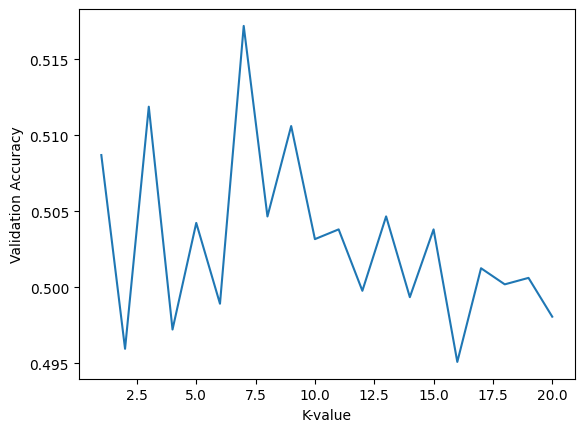

In [ ]:
#Accuracy Plot using Cross Validation Pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_standardized_data, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Validation Curve Plot
plt.plot(k_values, cv_scores)
plt.xlabel('K-value')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_standardized_data, y_train)

#Getting the best K from GridSearchCV
optimal_k = grid_search.best_params_['n_neighbors']

In [ ]:
optimal_k

7

#####**Predict using KNN**

In [ ]:
knn = KNeighborsClassifier(7)

In [ ]:
knn.fit(X_standardized_data, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
predicted_knn = pd.DataFrame(knn.predict(X_standardized_data))
predicted_knn.head()

,0
0,0
1,1
2,1
3,0
4,0


In [ ]:
#KNN Accuracy
print(f"KNN Accuracy: {knn.score(X_standardized_data, y_train)*100:.2f}%")

KNN Accuracy: 65.69%


####**2. Logistic Regression**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [ ]:
#Create model by all variables
model = linear_model.LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)

#Accuracy
accuracy = np.mean(y_pred == y_test)*100
print(f"Accuracy : {accuracy:.2f}%")

Accuracy : 49.74%


#####**Feature Selection to select variables**

In [ ]:
# Initialize the SequentialFeatureSelector model
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, direction="backward", n_features_to_select=5)

# Fit the SequentialFeatureSelector model
sfs.fit(X_standardized_data, y_train)

# Select the features
selected_features = sfs.get_support()

# Print the selected features
print(selected_features)

[False  True False  True False  True  True False  True]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_standardized_data.columns

Index(['Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count'],
      dtype='object')

variables selected
- word count
- uppercase count
- question count
- dollar count
- punctuation count

In [ ]:
X_selection = email.loc[:, ['Word Count', 'Uppercase Count', 'Question Count', 'Dollar Count', 'Punctuation Count']]

In [ ]:
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_selection, y,
                                                    test_size=0.20, random_state=123)

In [ ]:
##Create model after feature selection
model_selection = linear_model.LogisticRegression(max_iter = 10000)
model_selection.fit(X_train_logreg, y_train_logreg)

#Evaluate the model
y_pred = model_selection.predict(X_test_logreg)

#Accuracy
accuracy = np.mean(y_pred == y_test)*100
print(f"Accuracy : {accuracy:.2f}%")

Accuracy : 50.60%


###**4. Test Prediction**

In [ ]:
X_test.head(2)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
5120,3,4,24,3,1,1,1,1,4
437,3,6,45,0,2,1,0,8,2


In [ ]:
#Import library
from sklearn.preprocessing import StandardScaler

In [ ]:
#Define columns & index
X_test_columns = X_test.columns
X_test_index = X_test.index

In [ ]:
#Fit data
standardizer = StandardScaler()
standardizer.fit(X_test)

StandardScaler()

In [ ]:
#Transform data
standardized_raw = standardizer.transform(X_test)
Xtest_standardized_data = pd.DataFrame(standardized_raw)

In [ ]:
#Return back columns & index
Xtest_standardized_data.columns = X_test_columns
Xtest_standardized_data.index = X_test_index
Xtest_standardized_data.head(2)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
5120,1.363855,-0.304819,-1.519355,-1.142237,-0.840517,-0.490394,0.019804,-1.407300,0.864520
437,1.363855,0.332456,-1.261528,-1.191276,-0.260782,-0.490394,-1.205963,0.115025,-0.310149


In [ ]:
score = knn.score(Xtest_standardized_data, y_test)
print(f"Accuracy : {score:.4f}")

Accuracy : 0.5085


In [ ]:
test_predict = knn.predict(X_test)
test_predict

array([0, 0, 1, ..., 0, 0, 1])